In [1]:
#Print all the variables, not only the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

/Users/ressnn/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import roc_curve, auc

In [4]:
data0 = pd.read_csv('raw_stock_data.csv').drop('Unnamed: 0',axis=1)
data1 = pd.read_csv('result_data1.csv').drop('Unnamed: 0',axis=1)
data2 = pd.read_csv('result_data2.csv').drop('Unnamed: 0',axis=1)
data3 = pd.read_csv('result_data3.csv').drop('Unnamed: 0',axis=1)
data4 = pd.read_csv('result_data4.csv').drop('Unnamed: 0',axis=1)
data5 = pd.read_csv('result_data5.csv').drop('Unnamed: 0',axis=1)
data6 = pd.read_csv('result_data6.csv').drop('Unnamed: 0',axis=1)
data7 = pd.read_csv('result_data7.csv').drop('Unnamed: 0',axis=1)

In [5]:
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import KFold
kf = KFold(n_splits=10, random_state=63, shuffle=True)

In [6]:
def acu_curve(y,prob):
    fpr,tpr,threshold = roc_curve(y,prob) ###计算真正率和假正率
    roc_auc = auc(fpr,tpr) ###计算auc的值
    print(roc_auc)
 
    plt.figure()
    lw = 2
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.3f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
 
    plt.show()

In [76]:
def Cross_validation(Xtrain_set,ytrain_set):
    max_d = 20
    #Set up variables to store training and validation accuracies. 生成空数组用来装训练集和验证集的测评结果
    train_accuracies = [[] for _ in range(max_d)]  
    val_accuracies = [[] for _ in range(max_d)]

    # Loop over depths
    for d in range(max_d):
        clf = DecisionTreeClassifier(max_depth=d+1)

        #Loop over cross-validation splits. Note that we perform cross validation on our training data Xtr.
        for train_index, val_index in kf.split(Xtrain_set):   ## 这里的val是指validation集
            Xtrain, Xval = Xtrain_set[train_index], Xtrain_set[val_index]
            ytrain, yval = ytrain_set[train_index], ytrain_set[val_index]

            #Fit the classifier on Xtrain and Ytrain
            clf.fit(Xtrain, ytrain)
            pred_train = clf.predict(Xtrain)  #Make predictions on train set and assign to a variable pred_train
            pred_val = clf.predict(Xval)   #Make predictions on validation set and assign to a variable pred_val

            train_accuracies[d].append(accuracy_score(ytrain, pred_train))  #记录每一轮训练集和验证集的测评结果
            val_accuracies[d].append(accuracy_score(yval, pred_val))

    #Calculate the mean and standard deviation for each depth across splits 
    train_accuracy_mean = np.mean(train_accuracies, axis=1)
    train_accuracy_stdev = np.std(train_accuracies, axis=1)
    val_accuracy_mean = np.mean(val_accuracies, axis=1)
    val_accuracy_stdev = np.std(val_accuracies, axis=1)

    fig2=plt.figure()
    x = list(range(1,max_d+1))
    plt.plot(x,train_accuracy_mean, label = 'Training Accuracy')
    plt.plot(x,val_accuracy_mean, label = 'Validation Accuracy')
    plt.xlabel('Tree depth')
    plt.xticks(x)
    plt.legend()

In [7]:
def Evaluation(depth,Xtrain_set, Xtest, ytrain_set, ytest):
    gnb = GaussianNB(var_smoothing=0.)
    gnb.fit(Xtrain_set, ytrain_set)

    pred_test = gnb.predict(Xtest)
    pred_test_prob = gnb.predict_proba(Xtest)[:,1]

    #Calculate the accuracy on the test data
    print(precision_score(ytest, pred_test))
    print(recall_score(ytest, pred_test))
    print(accuracy_score(ytest, pred_test))
    acu_curve(ytest, pred_test_prob)

In [10]:
?GaussianNB

#### data 0 raw

In [8]:
X=data0.drop(['trade_date','trend'],axis=1).values
y=data0.trend.values
Xtrain_set, Xtest, ytrain_set, ytest = train_test_split(X, y, test_size=0.2, random_state=24)

0.5616652458084683
0.10726108427850436
0.49731798625467954
0.5196373631015139


<Figure size 432x288 with 0 Axes>

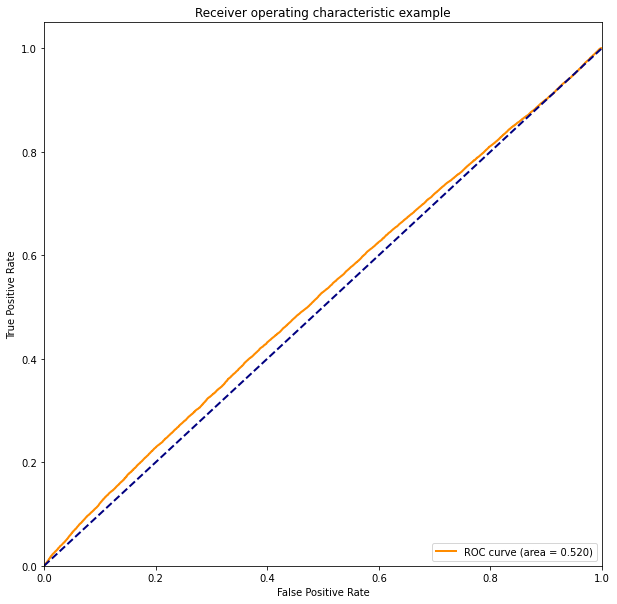

In [9]:
Evaluation(20,Xtrain_set, Xtest, ytrain_set, ytest)

#### data 1 Covid_China

In [11]:
X=data1.drop(['trade_date','trend','trade_month'],axis=1).values
y=data1.trend.values
Xtrain_set, Xtest, ytrain_set, ytest = train_test_split(X, y, test_size=0.2, random_state=24)

0.5263370170202468
0.8568614576493763
0.5320817277533829
0.5292815884088921


<Figure size 432x288 with 0 Axes>

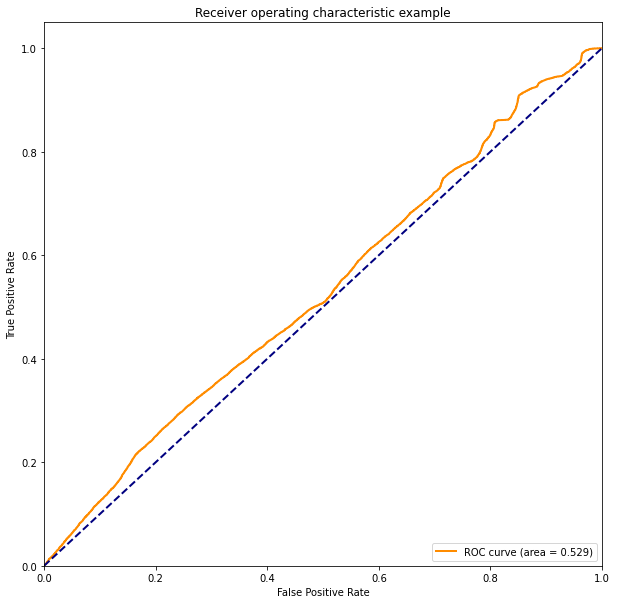

In [12]:
Evaluation(11,Xtrain_set, Xtest, ytrain_set, ytest)

#### data 2 Covid_World

In [13]:
X=data2.drop(['trade_date','trend','trade_month'],axis=1).values
y=data2.trend.values
Xtrain_set, Xtest, ytrain_set, ytest = train_test_split(X, y, test_size=0.2, random_state=24)

0.5967837998808815
0.10909090909090909
0.510686474843983
0.5409866517499939


<Figure size 432x288 with 0 Axes>

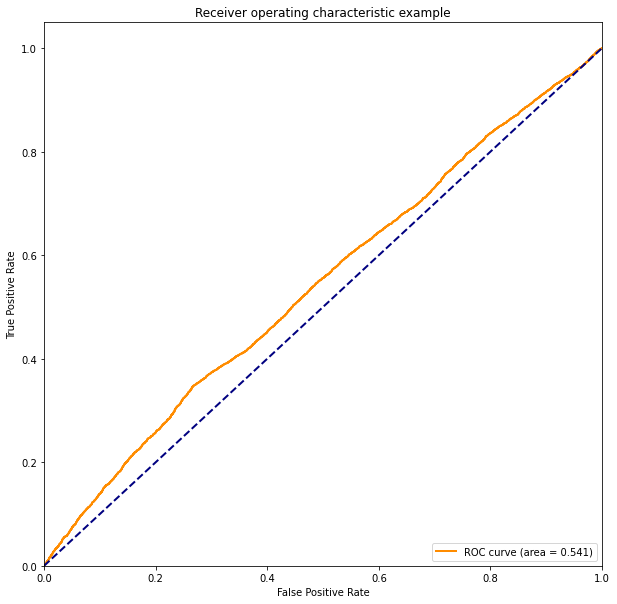

In [14]:
Evaluation(10,Xtrain_set, Xtest, ytrain_set, ytest)

#### data 3 China_macro_economy

In [15]:
X=data3.drop(['trend','trade_month'],axis=1).values
y=data3.trend.values
Xtrain_set, Xtest, ytrain_set, ytest = train_test_split(X, y, test_size=0.2, random_state=24)

0.5293811074918566
0.1521494907130018
0.4960552836164699
0.5254546204137807


<Figure size 432x288 with 0 Axes>

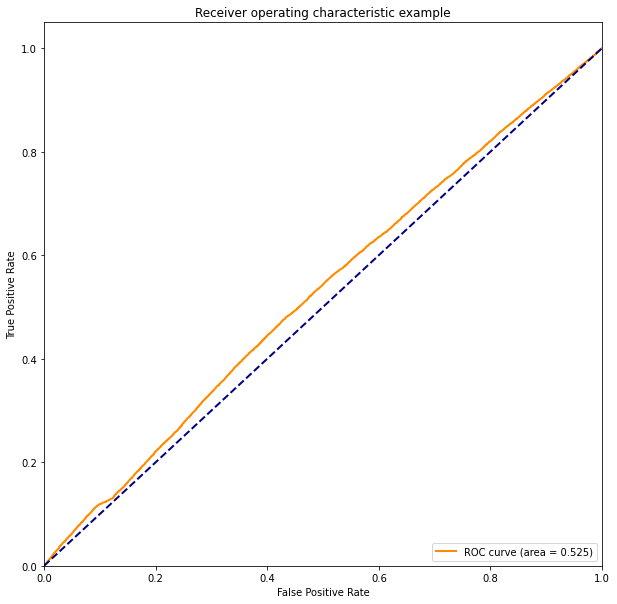

In [16]:
Evaluation(20,Xtrain_set, Xtest, ytrain_set, ytest)

#### data 4  Covid_China + Covid_World

In [17]:
X=data4.drop(['trend','trade_month'],axis=1).values
y=data4.trend.values
Xtrain_set, Xtest, ytrain_set, ytest = train_test_split(X, y, test_size=0.2, random_state=24)

0.5953654188948306
0.11403209286445885
0.5182656196654148
0.547486141581041


<Figure size 432x288 with 0 Axes>

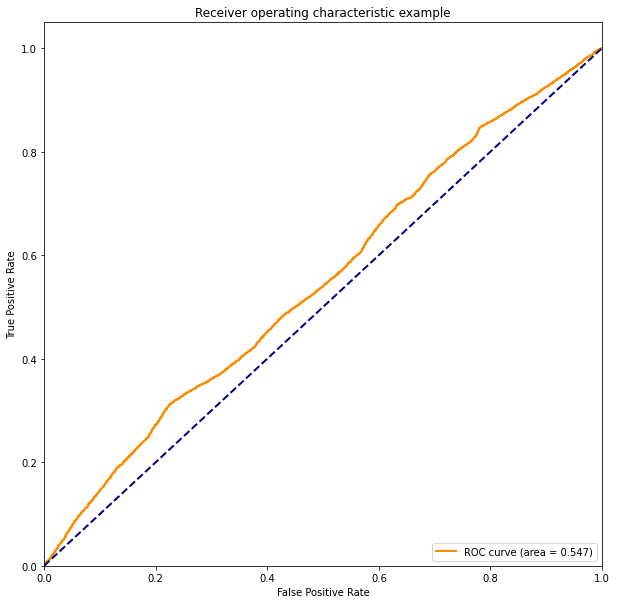

In [18]:
Evaluation(11,Xtrain_set, Xtest, ytrain_set, ytest)

#### data 5 Covid_world + China_macro_economy

In [19]:
X=data5.drop(['trend','trade_month'],axis=1).values
y=data5.trend.values
Xtrain_set, Xtest, ytrain_set, ytest = train_test_split(X, y, test_size=0.2, random_state=24)

0.5957149510945505
0.1392487751769189
0.5154360192190865
0.5396979837476115


<Figure size 432x288 with 0 Axes>

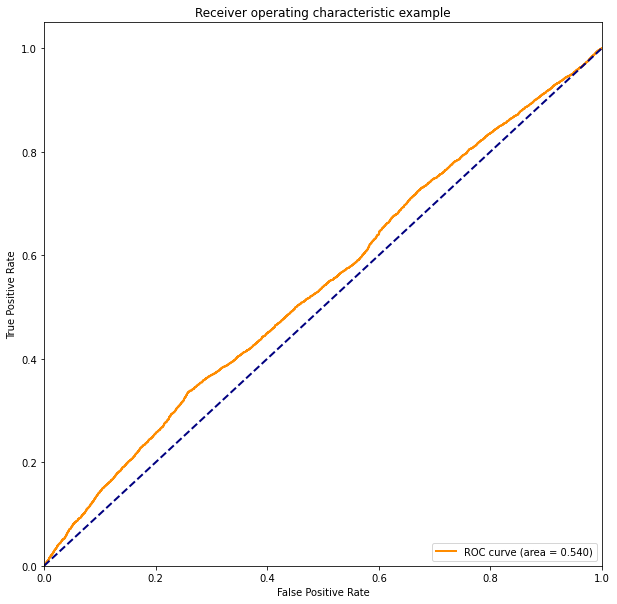

In [20]:
Evaluation(10,Xtrain_set, Xtest, ytrain_set, ytest)

#### data 6 Covid_China + China_macro_economy

In [21]:
X=data6.drop(['trend','trade_month'],axis=1).values
y=data6.trend.values
Xtrain_set, Xtest, ytrain_set, ytest = train_test_split(X, y, test_size=0.2, random_state=24)

0.5203462289544519
0.8631210330488072
0.522739492786092
0.5546226608761267


<Figure size 432x288 with 0 Axes>

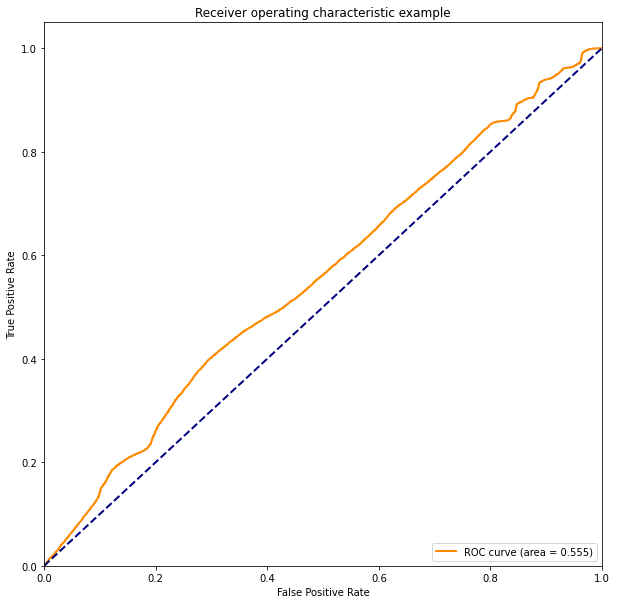

In [22]:
Evaluation(12,Xtrain_set, Xtest, ytrain_set, ytest)

#### data 7 Full

In [23]:
X=data7.drop(['trend','trade_month'],axis=1).values
y=data7.trend.values
Xtrain_set, Xtest, ytrain_set, ytest = train_test_split(X, y, test_size=0.2, random_state=24)

0.5818436733263231
0.18891544326846477
0.5265733469898713
0.542063546367116


<Figure size 432x288 with 0 Axes>

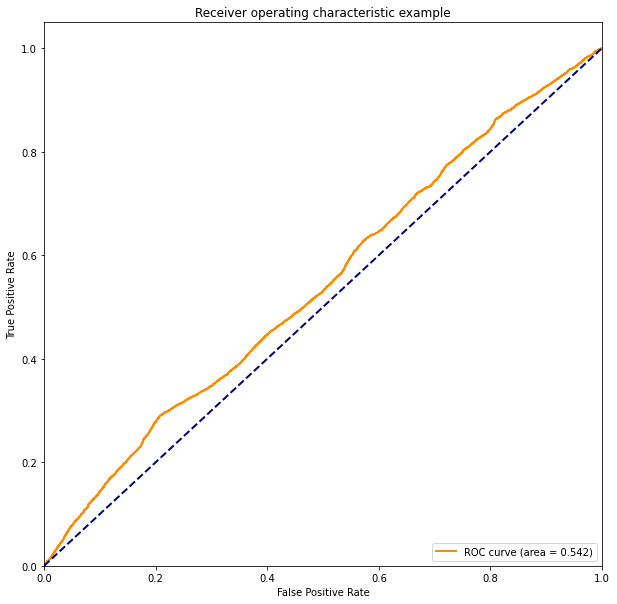

In [24]:
Evaluation(11,Xtrain_set, Xtest, ytrain_set, ytest)

In [27]:
data3

,open,high,low,pre_close,vol,amount,trend,trade_month,ppi_yoy,ppi_mom,ppi_accu,nt_val,nt_yoy,nt_mom,town_val,town_yoy,town_mom,cnt_val,cnt_yoy,cnt_mom
0,12.73,12.84,12.61,12.76,1539521.78,1954584.919,1,202006,-3.0,0.4,-1.9,102.5,2.5,-0.1,102.2,2.2,-0.1,103.2,3.2,0.0
1,12.76,12.80,12.59,12.85,1119647.80,1419972.017,0,202006,-3.0,0.4,-1.9,102.5,2.5,-0.1,102.2,2.2,-0.1,103.2,3.2,0.0
2,12.89,12.92,12.76,12.89,716468.24,918251.153,0,202006,-3.0,0.4,-1.9,102.5,2.5,-0.1,102.2,2.2,-0.1,103.2,3.2,0.0
3,12.90,12.99,12.86,12.82,718059.10,927043.687,1,202006,-3.0,0.4,-1.9,102.5,2.5,-0.1,102.2,2.2,-0.1,103.2,3.2,0.0
4,12.85,12.97,12.80,12.99,660313.07,850767.506,0,202006,-3.0,0.4,-1.9,102.5,2.5,-0.1,102.2,2.2,-0.1,103.2,3.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260467,7.90,7.97,7.45,8.00,132112.66,101834.171,0,202001,0.1,0.0,0.1,105.4,5.4,1.4,105.1,5.1,1.4,106.3,6.3,1.4
260468,8.07,8.19,7.60,8.05,127507.00,101453.140,0,202001,0.1,0.0,0.1,105.4,5.4,1.4,105.1,5.1,1.4,106.3,6.3,1.4
260469,64.50,68.47,62.58,66.40,94541.73,617582.447,0,202001,0.1,0.0,0.1,105.4,5.4,1.4,105.1,5.1,1.4,106.3,6.3,1.4
260470,66.51,67.19,62.33,68.27,125675.60,813983.559,0,202001,0.1,0.0,0.1,105.4,5.4,1.4,105.1,5.1,1.4,106.3,6.3,1.4
